## South German Credit Prediction
More information on the project can be found on the Kaggle website
https://www.kaggle.com/c/south-german-credit-prediction/overview/description

The model will be evaluated based on the accuracy score. 

In general, for fraud detection a better model is the one with High Recall score

### Set up the Environment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# import usual libraries 
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent sized plots 
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize']= 14
rcParams['xtick.labelsize'] =12
rcParams['ytick.labelsize'] = 12 

# handle operating system dependencies 
import os

# handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [2]:
# handle data and path to save the plots created during project 
ROOT_DIR = '.'
TRAIN_DATA = 'train'
TEST_DATA = 'test'
DATA_DESCR = 'DataDescription'

extension = '.csv'

TRAIN_DATA_PATH = os.path.join(ROOT_DIR,TRAIN_DATA+extension)
TEST_DATA_PATH = os.path.join(ROOT_DIR,TEST_DATA+extension)
DATA_DESCR_PATH = os.path.join(ROOT_DIR,DATA_DESCR+extension)

IMAGE_DIR =  'images'
IMAGE_PATH = os.path.join(ROOT_DIR,IMAGE_DIR)
os.makedirs(IMAGE_PATH,exist_ok=True)

In [3]:
# define function to save the figures
def save_figures(filename,extension='png',resolution=300,tight=True):
    figure = os.path.join(IMAGE_PATH,filename + '.' + extension)
    print (f'Saving the figure, please wait .....')
    # save the figure 
    if tight:
        plt.tight_layout()
    plt.savefig(figure,format=extension,dpi=resolution)
    print (f'your plot has been saved in {IMAGE_PATH}')

In [4]:
# READ THE TRAINING DATA AND TEST DATA INTO DATAFRAMES
train_credit = pd.read_csv(TRAIN_DATA_PATH)
test_credit = pd.read_csv(TEST_DATA_PATH) 

In [5]:
train_credit.head(20)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
5,6,1,8,4,0,3398,1,4,1,3,...,1,39,3,2,2,2,2,1,1,1
6,7,1,6,4,0,1361,1,2,2,3,...,1,40,3,2,1,2,1,1,1,1
7,8,4,18,4,3,1098,1,1,4,2,...,3,65,3,2,2,1,2,1,2,1
8,9,2,24,2,3,3758,3,1,1,2,...,4,23,3,1,1,1,2,1,2,1
9,10,1,11,4,0,3905,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1


In [6]:
train_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [7]:
# Rename the columns to English name for ease of comprehension
data_descr = pd.read_csv(DATA_DESCR_PATH)
data_descr.head(5)

,Column Name,Variable Name,Content
0,laufkont,status,status of the debtor's checking account with t...
1,laufzeit,duration,credit duration in months (quantitative)
2,moral,credit_history,history of compliance with previous or concurr...
3,verw,purpose,purpose for which the credit is needed (catego...
4,hoehe,amount,credit amount in DM (quantitative; result of m...


In [8]:
# rename the columns except the first "Id" column
dict_label = dict(data_descr['Variable Name'])
dict_label.values()

dict_values(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'])

In [9]:
# assign the corresponding english column names
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test_credit.columns =  ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [11]:
# check the dataframe after rename of the columns
train_credit.head(20)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
5,6,1,8,4,0,3398,1,4,1,3,...,1,39,3,2,2,2,2,1,1,1
6,7,1,6,4,0,1361,1,2,2,3,...,1,40,3,2,1,2,1,1,1,1
7,8,4,18,4,3,1098,1,1,4,2,...,3,65,3,2,2,1,2,1,2,1
8,9,2,24,2,3,3758,3,1,1,2,...,4,23,3,1,1,1,2,1,2,1
9,10,1,11,4,0,3905,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1


In [12]:
train_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,800.0,478.10125,278.883661,0.0,238.75,472.0,707.25,999.0
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0


In [13]:
# check info 
train_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

- There are no Null or Missing Data Items
- All the columns are represented as integers

In [14]:
# explicit check for any null values in the dataframe 
train_credit.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Saving the figure, please wait .....
your plot has been saved in .\images


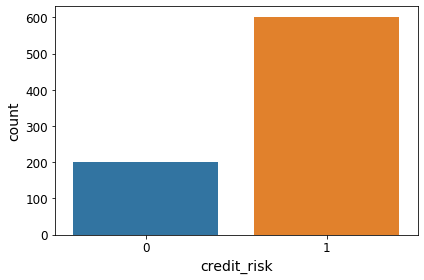

In [15]:
sns.countplot(train_credit['credit_risk'])
save_figures(filename='credit_risk_count')

- As expected there are way more people with good credit compare to bad credit risk
- The dataset is not balanced and accuracy of the model won't be good indication unless trained with balanced data

Saving the figure, please wait .....
your plot has been saved in .\images


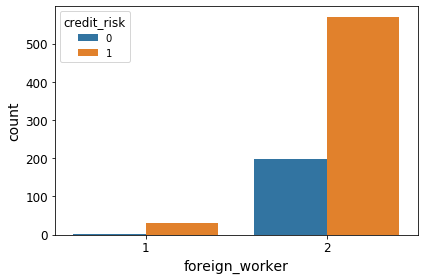

In [16]:
sns.countplot(train_credit['foreign_worker'],hue=train_credit['credit_risk'])
save_figures(filename='foreign_worker_credit_risk_count')

Saving the figure, please wait .....
your plot has been saved in .\images


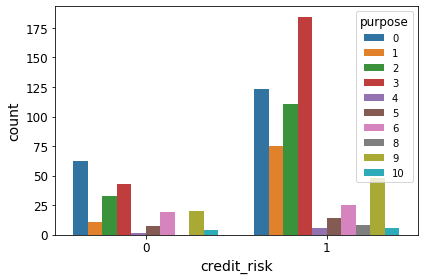

In [17]:
    sns.countplot(train_credit['credit_risk'],hue=train_credit['purpose'])
save_figures('credit_risk_purpose_count')

- Purpose 0 --> others, 1 --> new car, 3 --> furniture/equipment have the maximum bad loans

Saving the figure, please wait .....
your plot has been saved in .\images


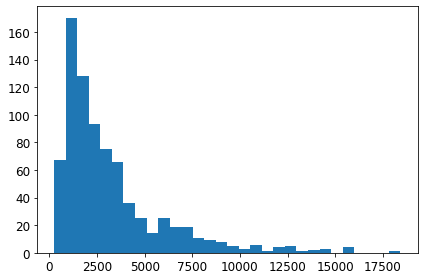

In [18]:
plt.hist(train_credit['amount'],bins=30);
save_figures('loan_amount_count')

In [19]:
# check the bad loans
train_credit[train_credit['credit_risk']==0]

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
600,45,1,18,2,0,1216,1,2,4,2,...,3,23,3,1,1,3,2,2,2,0
601,47,4,18,4,6,1864,2,3,4,2,...,1,30,3,2,2,3,2,1,2,0
602,171,1,12,2,0,1228,1,3,4,2,...,1,24,3,2,1,2,2,1,2,0
603,234,2,12,2,0,685,1,4,2,4,...,3,25,1,2,1,2,2,1,2,0
604,304,3,9,2,3,745,1,3,3,2,...,1,28,3,2,1,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,33,1,1,3,3,2,2,2,0
796,994,1,12,0,3,6199,1,3,4,3,...,2,28,3,1,2,3,2,2,2,0
797,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
798,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


Saving the figure, please wait .....
your plot has been saved in .\images


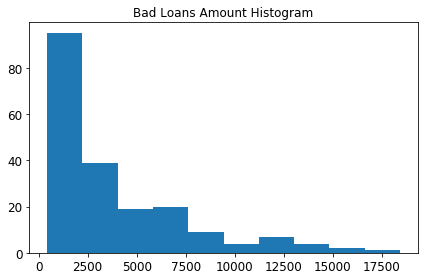

In [20]:
plt.hist(train_credit[train_credit['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')
save_figures('credit_risk_0_amount')

- The badloans is right skewed and with maximum bad loans under 7500
- Highest bad loan could be for the business (can be checked quickly)

In [21]:
# check the good and bad loan risk 
train_credit['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

In [22]:
data= train_credit.copy()

In [23]:
# drop the Id column as it is not useful for the model 
data.drop(['Id'],inplace=True,axis=1)

In [24]:
data.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


Saving the figure, please wait .....
your plot has been saved in .\images


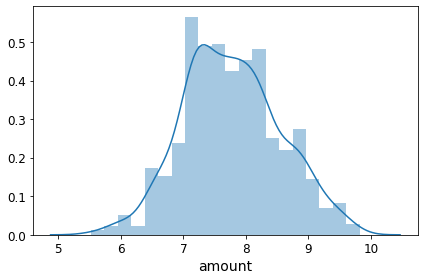

In [29]:
log_amount = np.log(data['amount'])
sns.distplot(log_amount,bins=20)
save_figures('dist_plot_loan_amount')

### Prepare data for Machine Learning Models
- age can be converted to ordinal data, for simplicity went with log transformation

In [31]:
# import the varios classifier models
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold

In [33]:
new_data = train_credit.copy()

In [34]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [35]:
new_data.drop('Id',axis=1,inplace=True)

In [36]:
new_data['log_amount'] = round(np.log(new_data['amount']),2)

In [37]:
new_data.drop('amount',axis=1,inplace=True)

In [38]:
new_data['log_age'] =  round(np.log(new_data['age']),2)

In [39]:
new_data['log_duration'] = round(np.log(new_data['duration']),2)

In [40]:
new_data.drop(['age','duration'],axis=1,inplace=True)

In [41]:
new_data.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,2,1,2,4,2,1,4,2,...,1,1,3,2,1,2,1,6.96,3.04,2.89
1,1,4,0,1,3,2,3,1,2,1,...,1,2,3,1,1,2,1,7.94,3.58,2.20
2,2,2,9,2,4,2,2,1,4,1,...,1,1,2,2,1,2,1,6.73,3.14,2.48
3,1,4,0,1,3,3,3,1,2,1,...,1,2,2,1,1,1,1,7.66,3.66,2.48
4,1,4,0,1,2,1,3,1,3,1,...,1,2,2,1,1,1,1,7.71,3.87,2.30


In [42]:
#new_data = new_data.astype(float)

In [43]:
new_data.tail()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
795,1,4,0,1,5,1,2,1,4,1,...,1,3,3,2,2,2,0,8.29,3.50,2.89
796,1,0,3,1,3,4,3,1,2,2,...,1,2,3,2,2,2,0,8.73,3.33,2.48
797,4,4,0,5,5,4,3,1,4,4,...,3,1,4,2,2,2,0,9.45,3.40,3.04
798,2,2,3,5,1,2,3,1,1,4,...,2,1,4,2,2,2,0,8.77,3.95,2.48
799,1,2,2,5,5,4,3,1,4,2,...,2,1,3,2,1,2,0,8.76,3.43,3.40


In [44]:
#new_data.tail(50)

In [45]:
X_full = new_data.drop('credit_risk',axis=1)
y_full = new_data['credit_risk']

- The data is organized where the last 200 rows has credit risk as 0
- Hence it is important to shuffle the dataset

In [572]:
# this will ensure that the data is randomized and then split into train and test 
# alternatively StratifiedRandomSplit is also recommended
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)


In [573]:
# try various models and pick the best one for further tuning 
def cross_validate(X = X_train,y = y_train):
    
    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('lightgbm',LGBMClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))
    

    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [50]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7770833333333333,Std Dev: 0.028792239502260942
Model:GB,Mean: 0.7802083333333333,Std Dev: 0.04527357044187652
Model:SVC,Mean: 0.7572916666666667,Std Dev: 0.016503103664327976
Model:SGD,Mean: 0.6921875,Std Dev: 0.13970474352928514
Model:LogReg,Mean: 0.7703125,Std Dev: 0.04097406128170195
Model:AdaBoost,Mean: 0.7671875,Std Dev: 0.046060634290573985
Model:Bag,Mean: 0.7453125,Std Dev: 0.0518458125719908
Model:xgboost,Mean: 0.7739583333333333,Std Dev: 0.04487637339278753
Model:lightgbm,Mean: 0.7697916666666667,Std Dev: 0.04873619818870661
Model:Dtree,Mean: 0.709375,Std Dev: 0.046979051182415334


### Prepare the test data 

In [574]:
test_sub = test_credit.copy()

In [575]:
test_sub.columns

Index(['Id', 'status', 'duration', 'credit_history', 'purpose', 'amount',
       'savings', 'employment_duration', 'installment_rate',
       'personal_status_sex', 'other_debtors', 'present_residence', 'property',
       'age', 'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')

In [576]:
test_sub.drop('Id',axis=1,inplace=True)

In [577]:
test_sub['log_amount'] = round(np.log(test_sub['amount']),2)

In [578]:
test_sub['log_age'] =  round(np.log(test_sub['age']),2)

In [579]:
test_sub['log_duration'] = round(np.log(test_sub['duration']),2)

In [580]:
test_sub.drop(['amount','age','duration'],axis=1,inplace=True)

In [581]:
test_sub.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,log_amount,log_age,log_duration
0,1,4,0,1,3,4,3,1,4,2,1,2,2,2,2,1,1,7.68,3.64,2.48
1,1,2,3,5,4,2,4,1,4,3,3,1,2,2,2,1,2,7.57,3.14,2.89
2,2,4,3,1,5,4,3,1,4,1,3,2,1,3,2,1,2,7.76,3.58,3.58
3,1,4,0,1,3,1,3,1,3,1,3,1,3,3,1,1,2,8.21,3.61,1.79
4,2,2,5,1,2,4,3,1,1,4,3,1,1,2,2,1,2,7.78,3.50,3.58


### Balance the data by Oversampling using ADASYN Library


In [582]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # use either ADASYN or SMOTE
from collections import Counter

In [711]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)


Counter({1: 485, 0: 468})

In [712]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [713]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8527448830409358,Std Dev: 0.03764626075195043
Model:GB,Mean: 0.8212682748538014,Std Dev: 0.04066572913667563
Model:SVC,Mean: 0.7712865497076022,Std Dev: 0.030194413156052192
Model:SGD,Mean: 0.6726315789473685,Std Dev: 0.069003367639288
Model:LogReg,Mean: 0.7548391812865495,Std Dev: 0.03877255345237747
Model:AdaBoost,Mean: 0.7611184210526317,Std Dev: 0.0394686542441786
Model:Bag,Mean: 0.807638888888889,Std Dev: 0.03249775482007666
Model:xgboost,Mean: 0.855529970760234,Std Dev: 0.035584923898591386
Model:lightgbm,Mean: 0.8496198830409356,Std Dev: 0.03935182348715627
Model:Dtree,Mean: 0.7530994152046782,Std Dev: 0.04276242626954487


- Based on the above result we will use the best models to fit and predict the score

In [714]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [715]:
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]

In [716]:
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [717]:
grid_search.best_params_

{'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 30}

In [718]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAD6F58CC8>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAD6F58D88>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001DAD6F58648>},
                   random_state=42, scoring='accuracy')

In [722]:
rnd_search.best_params_

{'max_depth': 8, 'max_features': 6, 'n_estimators': 386}

In [723]:
rf_clf = RandomForestClassifier(random_state=42,max_depth=8,max_features=6,n_estimators=386)

In [724]:
# hyper parameters selcted based on grid search 
xgb_clf =  XGBClassifier(n_estimators=30,max_depth=8,random_state=42,learning_rate=0.3,
                        booster='gbtree')

In [725]:
svc_clf = SVC(random_state=42)   # with default paramters

In [726]:
gb_clf = GradientBoostingClassifier(random_state=42) # default parameters

In [727]:
bag_clf = BaggingClassifier(random_state=42,base_estimator=XGBClassifier())

In [728]:
xgb_clf.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [729]:
rf_clf.fit(X_res,y_res)

RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)

In [730]:
svc_clf.fit(X_res,y_res)

SVC(random_state=42)

In [731]:
gb_clf.fit(X_res,y_res)

GradientBoostingClassifier(random_state=42)

In [732]:
bag_clf.fit(X_res,y_res)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               gamma=None, gpu_id=None,
                                               importance_type='gain',
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
           

In [733]:
predictions_train_xgb = xgb_clf.predict(X_test)

In [734]:
predictions_train_rf = rf_clf.predict(X_test)

In [735]:
predictions_train_svc = svc_clf.predict(X_test)

In [736]:
predictions_train_gb = gb_clf.predict(X_test)

In [737]:
predictions_train_bag = bag_clf.predict(X_test)

In [738]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_test,predictions_train_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_train_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_train_gb)))

Accuracy XGBoost...0.76875
Accuracy RForest...0.73125
Accuracy SupportVector...0.71875
Accuracy GBoost...0.70625
Accuracy Bagging...0.70625


In [739]:
print('Precision XGBoost...{}'.format(precision_score(y_test,predictions_train_xgb)))
print('Precision RForest...{}'.format(precision_score(y_test,predictions_train_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_test,predictions_train_svc)))
print('Precision GBoost...{}'.format(precision_score(y_test,predictions_train_gb)))
print('Precision Bagging...{}'.format(precision_score(y_test,predictions_train_gb)))

Precision XGBoost...0.8305084745762712
Precision RForest...0.8529411764705882
Precision SupportVector...0.8301886792452831
Precision GBoost...0.8090909090909091
Precision Bagging...0.8090909090909091


In [740]:
print('Recall XGBoost...{}'.format(recall_score(y_test,predictions_train_xgb)))
print('Recall RForest...{}'.format(recall_score(y_test,predictions_train_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_test,predictions_train_svc)))
print('Recall GBoost...{}'.format(recall_score(y_test,predictions_train_gb)))
print('Recall Bagging...{}'.format(recall_score(y_test,predictions_train_gb)))

Recall XGBoost...0.8521739130434782
Recall RForest...0.7565217391304347
Recall SupportVector...0.7652173913043478
Recall GBoost...0.7739130434782608
Recall Bagging...0.7739130434782608


In [741]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))
print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_svc))
print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))

XGBoost_Confusion Matrix
[[25 20]
 [17 98]]
RandomForest_Confusion Matrix
[[30 15]
 [28 87]]
SupportVector_Confusion Matrix
[[27 18]
 [27 88]]
GradientBoosting_Confusion Matrix
[[24 21]
 [26 89]]
Bagging_Confusion Matrix
[[24 21]
 [26 89]]


### Train the models on the entire training set & then predict on the submission test set 

In [742]:
train_oversample = pd.concat([X_res,X_test],axis=0)

In [743]:
test_oversample = pd.concat([y_res,y_test],axis=0)

In [744]:
train_oversample.shape

(1113, 20)

In [745]:
train_oversample.columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'log_amount', 'log_age', 'log_duration'],
      dtype='object')

In [746]:
test_oversample.shape # contains 0 and 1 for the credit risk

(1113,)

In [747]:
train_oversample = scalar.fit_transform(train_oversample)

In [748]:
xgb_clf.fit(train_oversample,test_oversample)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [749]:
rf_clf.fit(train_oversample,test_oversample)

RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)

In [750]:
svc_clf.fit(train_oversample,test_oversample)

SVC(random_state=42)

In [751]:
gb_clf.fit(train_oversample,test_oversample)

GradientBoostingClassifier(random_state=42)

In [752]:
bag_clf.fit(train_oversample,test_oversample)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               gamma=None, gpu_id=None,
                                               importance_type='gain',
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
           

In [753]:
predictions_final_xgb = xgb_clf.predict(scalar.transform(test_sub))


In [754]:
predictions_final_rf = rf_clf.predict(scalar.transform(test_sub))


In [755]:
predictions_final_svc = svc_clf.predict(scalar.transform(test_sub))


In [756]:
predictions_final_gb = gb_clf.predict(scalar.transform(test_sub))


In [757]:
predictions_final_bag = bag_clf.predict(scalar.transform(test_sub))


In [758]:
final_submission_XGB = pd.DataFrame(data=predictions_final_xgb)
final_submission_XGB.columns = ['kredit']
final_submission_XGB['Id'] = test_credit['Id']
final_submission_XGB = final_submission_XGB[['Id','kredit']]

final_submission_XGB.to_csv('Predictions_XGB.csv',index=False)

In [759]:
Counter(final_submission_XGB['kredit'])

Counter({1: 124, 0: 76})

### Multiple Model Voting
- If atleast 2 models predict credit risk as 1, then final score is 1 else it is 0

In [760]:
s_xgb = pd.Series(predictions_final_xgb, name='XGB')
s_rf = pd.Series(predictions_final_rf, name='RF')
s_svc = pd.Series(predictions_final_svc, name='SVC')
s_gb = pd.Series(predictions_final_gb, name='GB')
s_bag = pd.Series(predictions_final_bag, name='BAG')
idx = test_credit['Id']

In [761]:
model_pred = pd.concat([idx,s_xgb,s_rf,s_svc,s_gb,s_bag],axis=1)
model_pred.head()

,Id,XGB,RF,SVC,GB,BAG
0,4,1,1,1,1,1
1,14,1,1,1,1,1
2,18,1,1,1,1,1
3,20,1,1,1,1,1
4,22,0,0,0,0,0


In [762]:
model_pred['vote'] = model_pred[['XGB','RF','SVC','GB','BAG']].sum(axis=1)

In [763]:
model_pred.head()

,Id,XGB,RF,SVC,GB,BAG,vote
0,4,1,1,1,1,1,5
1,14,1,1,1,1,1,5
2,18,1,1,1,1,1,5
3,20,1,1,1,1,1,5
4,22,0,0,0,0,0,0


In [764]:
# criteria to select the final credit risk score 
def vote(vote_sum):
    if vote_sum >=2:
        return 1
    else:
        return 0

In [765]:
model_pred['kredit'] = model_pred['vote'].apply(vote)

In [766]:
model_pred.tail()

,Id,XGB,RF,SVC,GB,BAG,vote,kredit
195,982,1,0,1,0,1,3,1
196,984,1,1,1,1,1,5,1
197,988,0,0,0,0,0,0,0
198,995,0,0,0,0,0,0,0
199,996,1,0,0,1,1,3,1


In [767]:
len(model_pred[model_pred['vote']>=2])

130

In [768]:
submission = model_pred.drop(['XGB','RF','SVC','GB','BAG','vote'],axis=1)

In [769]:
submission.tail(20)

,Id,kredit
180,947,1
181,949,1
182,950,0
183,953,1
184,957,0
185,958,0
186,960,1
187,963,0
188,965,0
189,968,0


In [770]:
submission.to_csv('AggregatedModel_Predictions.csv',index=False)

In [771]:
submission['kredit'].value_counts()

1    130
0     70
Name: kredit, dtype: int64

### ***Train Artificial Neural Network - Optional Step***

In [772]:
from sklearn.preprocessing import StandardScaler

In [773]:
scalar = StandardScaler()
X_res_sc =  scalar.fit_transform(X_res)
X_test_sc = scalar.transform(X_test)

In [774]:
X_train_ar = np.asarray(X_res_sc)
y_train_ar = np.asarray(y_res)
X_test_ar = np.asarray(X_test_sc)
y_test_ar = np.asarray(y_test)

In [775]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [776]:
keras.backend.clear_session()
model_ann = Sequential()

# add 3 dense layers and the final output layer
model_ann.add(Flatten())
model_ann.add(Dense(units=300)) # activations relu,tanh,elu all resulted in exploding val_loss
model_ann.add(Dense(units=200))
model_ann.add(Dense(units=100))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(units=10))


# final output layer
model_ann.add(Dense(units=1,activation='sigmoid'))

# compile the model
model_ann.compile(optimizer='nadam',metrics=['accuracy'],loss='binary_crossentropy')

In [777]:
early_stop = EarlyStopping(patience=50,monitor='val_loss',restore_best_weights=True)

In [778]:
model_ann.fit(X_train_ar,y_train_ar,epochs=300,callbacks=[early_stop],
             validation_data=(X_test_ar,y_test_ar))

Train on 953 samples, validate on 160 samples
Epoch 1/300
953/953 [==============================] - 4s 4ms/sample - loss: 0.6262 - accuracy: 0.7104 - val_loss: 0.5408 - val_accuracy: 0.7250
Epoch 2/300
953/953 [==============================] - 0s 198us/sample - loss: 0.5989 - accuracy: 0.7377 - val_loss: 0.5922 - val_accuracy: 0.6438
Epoch 3/300
953/953 [==============================] - 0s 193us/sample - loss: 0.5380 - accuracy: 0.7513 - val_loss: 0.5130 - val_accuracy: 0.7375
Epoch 4/300
953/953 [==============================] - 0s 185us/sample - loss: 0.5404 - accuracy: 0.7419 - val_loss: 0.5459 - val_accuracy: 0.7063
Epoch 5/300
953/953 [==============================] - 0s 182us/sample - loss: 0.5395 - accuracy: 0.7408 - val_loss: 0.5295 - val_accuracy: 0.7000
Epoch 6/300
953/953 [==============================] - 0s 255us/sample - loss: 0.5349 - accuracy: 0.7513 - val_loss: 0.5122 - val_accuracy: 0.7312
Epoch 7/300
953/953 [==============================] - 0s 267us/sample - l

In [779]:
predictions_ann = model_ann.predict_classes(X_test_ar)

In [780]:
print(accuracy_score(y_test,predictions_ann))

0.73125


In [781]:
test_sub_ar = np.asarray(test_sub)

In [782]:
predictions_final_ANN = model_ann.predict_classes(test_sub_ar)

In [783]:
loss = pd.DataFrame(model_ann.history.history)

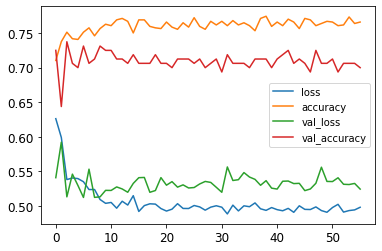

In [784]:
loss.plot()

In [785]:
loss.tail()

,loss,accuracy,val_loss,val_accuracy
51,0.502219,0.760755,0.540645,0.69375
52,0.490994,0.761805,0.531235,0.70625
53,0.493198,0.773347,0.530865,0.70625
54,0.494159,0.763903,0.532454,0.70625
55,0.497958,0.766002,0.524270,0.70000


In [786]:
final_submission_ANN = pd.DataFrame(data=predictions_final_ANN)
final_submission_ANN.columns = ['kredit']
final_submission_ANN['Id'] = test_credit['Id']
final_submission_ANN = final_submission_ANN[['Id','kredit']]

final_submission_ANN.to_csv('Predictions_ANN.csv',index=False)

In [787]:
final_submission_ANN['kredit'].value_counts()

1    200
Name: kredit, dtype: int64